<h1>Model Development</h1>

## Loading Data and Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
data = pd.read_csv('data.csv')
l=[]
data.shape
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<h2>Splitting data into Train and Test sets: Stratified Sampling</h2>

In [86]:
y=data['project_is_approved'].values
X=data.drop(['project_is_approved'], axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, stratify=y)

<h2>Essay feature Vectorization: Bag Of Words vs TF-IDF</h2>

In [87]:
print('Essay Feature BOW Featurization:')    
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('='*50)

vectorizer=CountVectorizer(min_df=10, ngram_range=(1, 2), max_features=5000)
vectorizer.fit(X_train['essay'].values)
l.extend(vectorizer.get_feature_names())

final_essay_vec = vectorizer

X_train_essay_bow=vectorizer.transform(X_train['essay'].values)
X_test_essay_bow=vectorizer.transform(X_test['essay'].values)

print('After Vectorization:')
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)

print('='*100)

print('Essay Feature Tfidf Featurization:')    
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('='*50)

vectorizer=TfidfVectorizer(min_df=10, ngram_range=(1, 2), max_features=5000)
vectorizer.fit(X_train['essay'].values)

X_train_essay_tfidf=vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf=vectorizer.transform(X_test['essay'].values)

print('After Vectorization:')
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

Essay Feature BOW Featurization:
(73196, 8) (73196,)
(36052, 8) (36052,)
After Vectorization:
(73196, 5000) (73196,)
(36052, 5000) (36052,)
Essay Feature Tfidf Featurization:
(73196, 8) (73196,)
(36052, 8) (36052,)
After Vectorization:
(73196, 5000) (73196,)
(36052, 5000) (36052,)


<h2>School State feature One Hot Encoding</h2>

In [88]:
print('School State Feature One Hot Encoding:')    
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('='*50)

vectorizer=CountVectorizer()
X_train_state_ohe=vectorizer.fit_transform(X_train['school_state'].values)
X_test_state_ohe=vectorizer.transform(X_test['school_state'].values)
l.extend(vectorizer.get_feature_names())

final_state_vec = vectorizer

print('After Vectorization:')
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)

School State Feature One Hot Encoding:
(73196, 8) (73196,)
(36052, 8) (36052,)
After Vectorization:
(73196, 51) (73196,)
(36052, 51) (36052,)


<h2>Teacher Prefix feature One Hot Encoding</h2>

In [89]:
print('Teacher Prefix Feature One Hot encoding:')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('='*50)

vectorizer=CountVectorizer()
X_train_prefix_ohe=vectorizer.fit_transform(X_train['teacher_prefix'].values)
X_test_prefix_ohe=vectorizer.transform(X_test['teacher_prefix'].values)
l.extend(vectorizer.get_feature_names())

final_prefix_vec = vectorizer

print('After Vectorziation:')
print(X_train_prefix_ohe.shape, y_train.shape)
print(X_test_prefix_ohe.shape, y_test.shape)

Teacher Prefix Feature One Hot encoding:
(73196, 8) (73196,)
(36052, 8) (36052,)
After Vectorziation:
(73196, 5) (73196,)
(36052, 5) (36052,)


<h2>Project Grade Category feature One Hot Encoding</h2>

In [90]:
print('Project Grade Category Feature One Hot Encoding:')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('='*50)

vectorizer=CountVectorizer()
X_train_grade_ohe=vectorizer.fit_transform(X_train['project_grade_category'].values)
X_test_grade_ohe=vectorizer.transform(X_test['project_grade_category'].values)
l.extend(vectorizer.get_feature_names())

final_grade_vec = vectorizer

print('After Vectorization:')
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)

Project Grade Category Feature One Hot Encoding:
(73196, 8) (73196,)
(36052, 8) (36052,)
After Vectorization:
(73196, 4) (73196,)
(36052, 4) (36052,)


<h2>Categories feature One Hot Encoding</h2>

In [91]:
print('Clean Categories Feature One Hot Encoding:')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('='*50)

vectorizer=CountVectorizer()
X_train_cat_ohe=vectorizer.fit_transform(X_train['clean_categories'].values)
X_test_cat_ohe=vectorizer.transform(X_test['clean_categories'].values)
l.extend(vectorizer.get_feature_names())

final_cat_vec = vectorizer

print('After Vectorization:')
print(X_train_cat_ohe.shape, y_train.shape)
print(X_test_cat_ohe.shape, y_test.shape)

Clean Categories Feature One Hot Encoding:
(73196, 8) (73196,)
(36052, 8) (36052,)
After Vectorization:
(73196, 9) (73196,)
(36052, 9) (36052,)


<h2>Sub-Categories feature One Hot Encoding</h2>

In [92]:
print('Clean Sub Categories Feature One Hot Encoding:')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('='*50)

vectorizer=CountVectorizer()
X_train_subcat_ohe=vectorizer.fit_transform(X_train['clean_subcategories'].values)
X_test_subcat_ohe=vectorizer.transform(X_test['clean_subcategories'].values)
l.extend(vectorizer.get_feature_names())

final_subcat_vec = vectorizer

print('After Vectorization:')
print(X_train_subcat_ohe.shape, y_train.shape)
print(X_test_subcat_ohe.shape, y_test.shape)

Clean Sub Categories Feature One Hot Encoding:
(73196, 8) (73196,)
(36052, 8) (36052,)
After Vectorization:
(73196, 30) (73196,)
(36052, 30) (36052,)


<h2>Price Feature Normalization</h2>

In [93]:
print('Normalizing Price Feature:')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('='*50)

normalizer=Normalizer()
X_train_price_norm=normalizer.fit_transform(X_train['price'].values.reshape(1, -1))
X_test_price_norm=normalizer.fit_transform(X_test['price'].values.reshape(1, -1))
l.append('price')

final_price_norm = Normalizer()

print("After Normalization:")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print('='*50)
print('X_train_price_norm: ', X_train_price_norm)
print('X_test_price_norm: ', X_test_price_norm)

Normalizing Price Feature:
(73196, 8) (73196,)
(36052, 8) (36052,)
After Normalization:
(1, 73196) (73196,)
(1, 36052) (36052,)
X_train_price_norm:  [[0.00076787 0.00233756 0.00197774 ... 0.00264029 0.00012698 0.00571691]]
X_test_price_norm:  [[0.00316105 0.00115257 0.00074346 ... 0.00144125 0.00013656 0.00099582]]


In [94]:
X_tr=hstack((X_train_essay_bow, X_train_state_ohe, X_train_prefix_ohe, X_train_grade_ohe, X_train_cat_ohe, X_train_subcat_ohe, X_train_price_norm.reshape(-1, 1))).tocsr()
X_te=hstack((X_test_essay_bow, X_test_state_ohe, X_test_prefix_ohe, X_test_grade_ohe, X_test_cat_ohe, X_test_subcat_ohe, X_test_price_norm.reshape(-1, 1))).tocsr()

# for TFIDF

X_tr1=hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_prefix_ohe, X_train_grade_ohe, X_train_cat_ohe, X_train_subcat_ohe, X_train_price_norm.reshape(-1, 1))).tocsr()
X_te1=hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_prefix_ohe, X_test_grade_ohe, X_test_cat_ohe, X_test_subcat_ohe, X_test_price_norm.reshape(-1, 1))).tocsr()

print('Final Data Matrix:')
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)

Final Data Matrix:
(73196, 5100) (73196,)
(36052, 5100) (36052,)


<h2>Applying Machine Learning</h2>

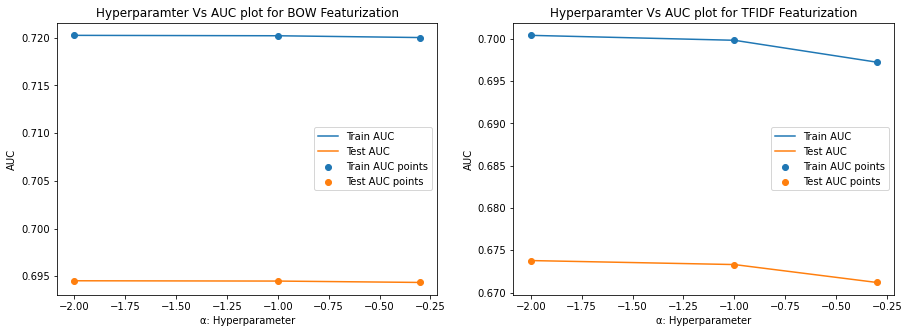

Best alpha for BOW Featurization:  0.01
Best alpha for TFIDF Featurization:  0.01


In [95]:
nb_model=MultinomialNB()
parameters={'alpha': [0.01, 0.1, 0.5]}
clf=GridSearchCV(nb_model, parameters, cv=10, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, y_train)

results=pd.DataFrame.from_dict(clf.cv_results_)
results=results.sort_values(['param_alpha'])

train_auc=results['mean_train_score']
train_auc_std=results['std_train_score']
test_auc=results['mean_test_score']
test_auc_std=results['std_test_score']
alphas=results['param_alpha']
log_alphas=[math.log10(i) for i in alphas]

plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, test_auc, label='Test AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, test_auc, label='Test AUC points')

plt.title('Hyperparamter Vs AUC plot for BOW Featurization')
plt.xlabel('\u03B1: Hyperparameter')
plt.ylabel('AUC')
plt.legend()
best_params_bow=clf.best_params_

#for TFIDF

nb_model=MultinomialNB()
parameters={'alpha': [0.01, 0.1, 0.5]}
clf=GridSearchCV(nb_model, parameters, cv=10, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr1, y_train)

results=pd.DataFrame.from_dict(clf.cv_results_)
results=results.sort_values(['param_alpha'])

train_auc=results['mean_train_score']
train_auc_std=results['std_train_score']
test_auc=results['mean_test_score']
test_auc_std=results['std_test_score']
alphas=results['param_alpha']
log_alphas=[math.log10(i) for i in alphas]

plt.subplot(1, 2, 2)
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, test_auc, label='Test AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, test_auc, label='Test AUC points')

plt.title('Hyperparamter Vs AUC plot for TFIDF Featurization')
plt.xlabel('\u03B1: Hyperparameter')
plt.ylabel('AUC')
plt.legend()
plt.show()
best_params_tfidf=clf.best_params_
print('Best alpha for BOW Featurization: ', best_params_bow['alpha'])
print('Best alpha for TFIDF Featurization: ', best_params_tfidf['alpha'])

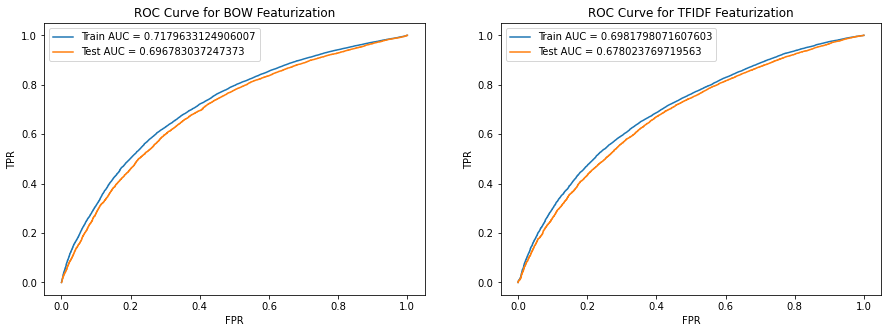

In [96]:
nb_model=MultinomialNB(alpha=best_params_bow['alpha'])
nb_model.fit(X_tr, y_train)

final_model = nb_model

y_train_pred_bow=nb_model.predict_proba(X_tr)[:,1]
y_test_pred_bow=nb_model.predict_proba(X_te)[:,1]

train_fpr_bow, train_tpr_bow, tr_thresholds_bow=roc_curve(y_train, y_train_pred_bow)
test_fpr_bow, test_tpr_bow, te_thresholds_bow=roc_curve(y_test, y_test_pred_bow)

plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(train_fpr_bow, train_tpr_bow, label='Train AUC = '+str(auc(train_fpr_bow, train_tpr_bow)))
plt.plot(test_fpr_bow, test_tpr_bow, label='Test AUC = '+str(auc(test_fpr_bow, test_tpr_bow)))

plt.title('ROC Curve for BOW Featurization')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# for TFIDF

nb_model=MultinomialNB(alpha=best_params_tfidf['alpha'])
nb_model.fit(X_tr1, y_train)

y_train_pred_tfidf=nb_model.predict_proba(X_tr1)[:,1]
y_test_pred_tfidf=nb_model.predict_proba(X_te1)[:,1]

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf=roc_curve(y_train, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf=roc_curve(y_test, y_test_pred_tfidf)

plt.subplot(1, 2, 2)
plt.plot(train_fpr_tfidf, train_tpr_tfidf, label='Train AUC = '+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label='Test AUC = '+str(auc(test_fpr_tfidf, test_tpr_tfidf)))

plt.title('ROC Curve for TFIDF Featurization')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [ ]:
def predict_with_best_t(proba, threshold):
    predictions=[]
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
best_t_bow=tr_thresholds_bow[np.argmax(train_tpr_bow*(1-train_fpr_bow))]
plt.subplots(2, 2, figsize=(10, 7))
plt.subplot(2, 2, 1)
cm_train_bow=confusion_matrix(y_train, predict_with_best_t(y_train_pred_bow, best_t_bow))
sns.heatmap(cm_train_bow, annot=True, fmt='d', cmap='Blues')
plt.title('Train Confusion Matrix  BOW')

plt.subplot(2, 2, 2)
cm_test_bow=confusion_matrix(y_test, predict_with_best_t(y_test_pred_bow, best_t_bow))
sns.heatmap(cm_test_bow, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix BOW')

# for TFIDF

best_t_tfidf=tr_thresholds_tfidf[np.argmax(train_tpr_tfidf*(1-train_fpr_tfidf))]
plt.subplot(2, 2, 3)
cm_train_tfidf=confusion_matrix(y_train, predict_with_best_t(y_train_pred_tfidf, best_t_tfidf))
sns.heatmap(cm_train_tfidf, annot=True, fmt='d', cmap='Blues')
plt.title('Train Confusion Matrix TFIDF')

plt.subplot(2, 2, 4)
cm_test_tfidf=confusion_matrix(y_test, predict_with_best_t(y_test_pred_tfidf, best_t_tfidf))
sns.heatmap(cm_test_tfidf, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix TFIDF')
plt.show()

In [ ]:
data.head(1)

In [ ]:
essay = data.head(1)['essay'][0]
essay

In [ ]:
essay_ready = final_essay_vec.transform([essay])
essay_ready

In [ ]:
state = data.head(1)['school_state'][0]
state

In [ ]:
state_ready = final_state_vec.transform([state])
state_ready

In [ ]:
prefix = data.head(1)['teacher_prefix'][0]
prefix

In [ ]:
prefix_ready = final_prefix_vec.transform([prefix])
prefix_ready

In [ ]:
grade = data.head(1)['project_grade_category'][0]
grade

In [ ]:
grade_ready = final_grade_vec.transform([grade])
grade_ready

In [ ]:
cat = data.head(1)['clean_categories'][0]
cat

In [ ]:
cat_ready = final_cat_vec.transform([cat])
cat_ready

In [ ]:
subcat = data.head(1)['clean_subcategories'][0]
subcat

In [ ]:
subcat_ready = final_subcat_vec.transform([subcat])
subcat_ready

In [ ]:
price = np.array(data.head(1)['price'][0])
price

In [ ]:
price_ready = final_price_norm.transform(price.reshape(1, -1))
price_ready

In [ ]:
sample = hstack((essay_ready, state_ready, prefix_ready, grade_ready, cat_ready, subcat_ready, 1)).tocsr()

In [ ]:
prediction = final_model.predict_proba(sample)[:,1][0]
prediction

In [ ]:
!mkdir models

In [ ]:
import pickle
with open('models/final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [ ]:
with open('models/final_essay_vec.pkl', 'wb') as file:
    pickle.dump(final_essay_vec, file)

In [ ]:
with open('models/final_state_vec.pkl', 'wb') as file:
    pickle.dump(final_state_vec, file)

In [ ]:
with open('models/final_prefix_vec.pkl', 'wb') as file:
    pickle.dump(final_prefix_vec, file)

In [ ]:
with open('models/final_grade_vec.pkl', 'wb') as file:
    pickle.dump(final_grade_vec, file)

In [ ]:
with open('models/final_cat_vec.pkl', 'wb') as file:
    pickle.dump(final_cat_vec, file)

In [ ]:
with open('models/final_subcat_vec.pkl', 'wb') as file:
    pickle.dump(final_subcat_vec, file)

In [ ]:
with open('models/final_price_norm.pkl', 'wb') as file:
    pickle.dump(final_price_norm, file)

<h1>Summary</h1>

In [ ]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=['Vectorizer', 'Model', 'Hyperparameter', 'AUC']
x.add_row(['BOW', 'Multinomial Naive Bayes', best_params_bow['alpha'], auc(test_fpr_bow, test_tpr_bow)])
x.add_row(['TFIDF', 'Multinomial Naive Bayes', best_params_tfidf['alpha'], auc(test_fpr_tfidf, test_tpr_tfidf)])
print(x)